In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 16-bit case

In [2]:
# No early-termination
baseline = np.genfromtxt('16_bit/sim/output_noearlystop.txt', dtype=int)[:-1]
proposed = np.genfromtxt(
    '16_bit_opt/sim/output_noearlystop.txt', dtype=int)[:-1]

# Early-termination|
baseline_stop = np.genfromtxt(
    '16_bit/sim/output.txt', dtype=int)[:-1]
proposed_stop = np.genfromtxt(
    '16_bit_opt/sim/output.txt', dtype=int)[:-1]

In [3]:
len(baseline)

32769

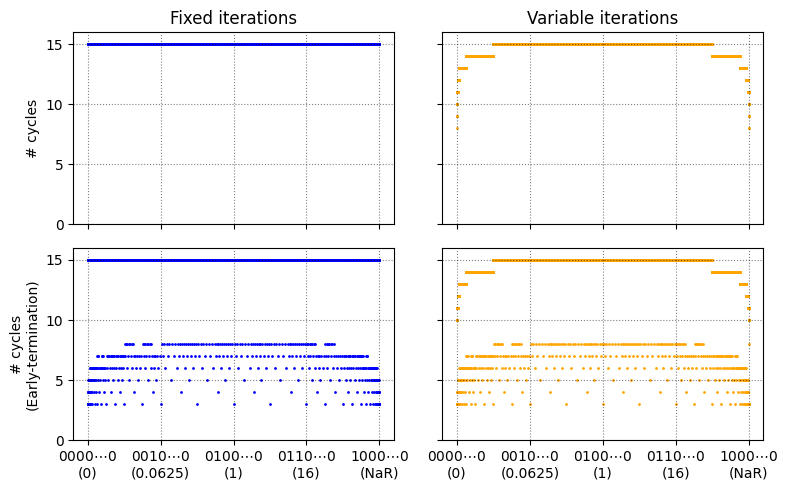

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 5))

axes = [ax1[0], ax2[0], ax1[1], ax2[1]]

# Creating the sub-plots.
# l11 = ax1[0].plot(baseline, color="b")
# l12 = ax1[1].plot(proposed, color="orange")
# l21 = ax2[0].plot(baseline_stop, color="b")
# l22 = ax2[1].plot(proposed_stop, color="orange")


# Creating the sub-plots.
x = range(0, len(baseline))
l11 = ax1[0].scatter(x, baseline, color="b", s=1)
l12 = ax1[1].scatter(x, proposed, color="orange", s=1)
l21 = ax2[0].scatter(x, baseline_stop, color="b", s=1)
l22 = ax2[1].scatter(x, proposed_stop, color="orange", s=1)

# Title for subplots
ax1[0].set_title('Fixed iterations')
ax1[1].set_title('Variable iterations')
ax1[0].set_ylabel('# cycles')
ax2[0].set_ylabel('# cycles\n(Early-termination)')

ax2[1].set_xticks(range(0, len(baseline), 16384//2))
ax2[1].set_xticklabels([
    r'$0000\cdots0$'+'\n(0)',
    r'$0010\cdots0$'+'\n(0.0625)',
    r'$0100\cdots0$'+'\n(1)',
    r'$0110\cdots0$'+'\n(16)',
    r'$1000\cdots0$'+'\n(NaR)'
])

for ax in axes:
    ax.grid(color="k", alpha=0.5, linestyle=":", zorder=1)
    ax.set_ylim(0, 16)

# Adjusting the sub-plots
plt.tight_layout()

plt.savefig('figs/posit16_iters.pdf', bbox_inches="tight")
plt.savefig('figs/posit16_iters_low.png', bbox_inches="tight", dpi=300)
plt.show()

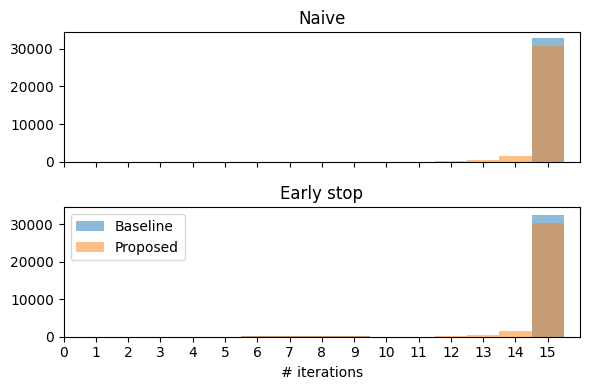

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6, 4))

MAX_V = np.max(baseline)+1

ax[0].hist(baseline, bins=range(MAX_V), align='right',
           alpha=0.5, width=1, label='Baseline')
ax[0].hist(proposed, bins=range(MAX_V), align='right',
           alpha=0.5, width=1, label='Proposed')

ax[1].hist(baseline_stop, bins=range(MAX_V), align='right',
           alpha=0.5, width=1, label='Baseline')
ax[1].hist(proposed_stop, bins=range(MAX_V), align='right',
           alpha=0.5, width=1, label='Proposed')


# Title for subplots
ax[0].set_title('Naive')
ax[1].set_title('Early stop')
ax[1].set_xlabel('# iterations')

ax[0].set_xlim(0, MAX_V)
ax[1].set_xlim(0, MAX_V)
ax[0].set_xticks(range(MAX_V))
ax[1].set_xticks(range(MAX_V))
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

plt.legend()
# Adjusting the sub-plots
plt.tight_layout()

plt.show()

In [ ]:
print(stats.describe(baseline))
print()
print(stats.describe(proposed))
print()
print(stats.describe(baseline_stop))
print()
print(stats.describe(proposed_stop))
print()

DescribeResult(nobs=32768, minmax=(15, 15), mean=15.0, variance=0.0, skewness=nan, kurtosis=nan)

DescribeResult(nobs=32768, minmax=(8, 15), mean=14.66668701171875, variance=0.44415282271774004, skewness=-2.490960801632485, kurtosis=8.08651889479254)

DescribeResult(nobs=32768, minmax=(3, 15), mean=14.87890625, variance=1.1135441145054477, skewness=-8.892222693547785, kurtosis=79.69581815732556)

DescribeResult(nobs=32768, minmax=(3, 15), mean=14.55908203125, variance=1.44967855426191, skewness=-5.681012768949008, kurtosis=40.41120050143223)



/tmp/ipykernel_29597/1076386541.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(stats.describe(baseline))


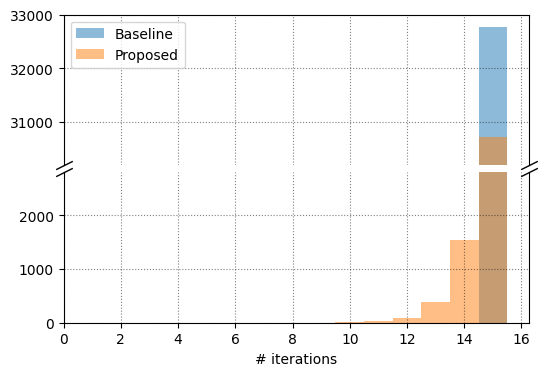

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

MAX_V = np.max(baseline)+1

# plot the same data on both axes
ax1.hist(baseline, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Baseline')
ax1.hist(proposed, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Proposed')
ax2.hist(baseline, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Baseline')
ax2.hist(proposed, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Proposed')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(30200, 33000)  # outliers only
ax2.set_ylim(0, 2800)  # most of the data
ax1.set_xlim(left=0)  # outliers only
ax2.set_xlim(left=0)  # most of the data

# hide the spines between ax1 and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.set_ticks_position('none')  # tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()
ax2.xaxis.set_ticks_position('bottom')

# ax1.set_xticks(range(MAX_V))
# ax2.set_xticks(range(MAX_V))

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Plot final customization
ax1.legend()
ax2.set_xlabel('# iterations')
ax1.grid(color="k", alpha=0.5, linestyle=":", zorder=1)
ax2.grid(color="k", alpha=0.5, linestyle=":", zorder=1)

plt.show()

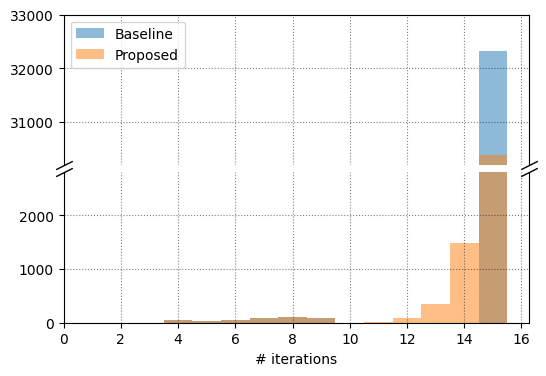

In [ ]:
# Results with early stop
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

MAX_V = np.max(baseline_stop)+1

# plot the same data on both axes
ax1.hist(baseline_stop, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Baseline')
ax1.hist(proposed_stop, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Proposed')
ax2.hist(baseline_stop, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Baseline')
ax2.hist(proposed_stop, bins=range(MAX_V), align='right',
         alpha=0.5, width=1, label='Proposed')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(30200, 33000)  # outliers only
ax2.set_ylim(0, 2800)  # most of the data
ax1.set_xlim(left=0)  # outliers only
ax2.set_xlim(left=0)  # most of the data

# hide the spines between ax1 and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.set_ticks_position('none')  # tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()
ax2.xaxis.set_ticks_position('bottom')

# ax1.set_xticks(range(MAX_V))
# ax2.set_xticks(range(MAX_V))

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Plot final customization
ax1.legend()
ax2.set_xlabel('# iterations')
ax1.grid(color="k", alpha=0.5, linestyle=":", zorder=1)
ax2.grid(color="k", alpha=0.5, linestyle=":", zorder=1)

plt.show()